# Polynomial Regression

In [1]:
import os
import numpy as np
import numpy.random as rnd

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2+np.random.randn(m, 1)

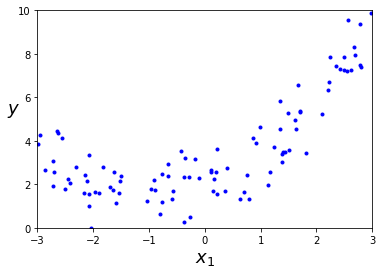

In [3]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
plt.show()

In [5]:
from sklearn.preprocessing import PolynomialFeatures
poly_features =  PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

In [6]:
X[0]

array([-0.90035549])

In [7]:
X_poly[0]

array([-0.90035549,  0.81064   ])

PolynomialFeaturesは特徴量のn乗の特徴量を作成する

特徴量が複数存在するときは，それぞれの組み合わせも特徴量として加える（例えば，a,bの場合，a^2, ab, b^2）

In [8]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

/Users/yamaji/study/python/py36/env/lib/python3.6/site-packages/scipy/linalg/basic.py:1226: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


(array([1.94847203]), array([[0.92799939, 0.50378408]]))

coef_は，１乗と２乗の係数

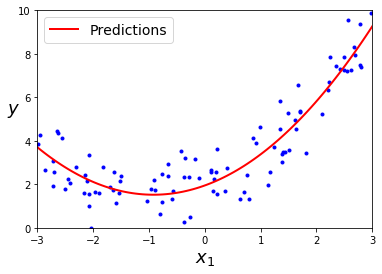

In [13]:
X_new = np.linspace(-3, 3, 100).reshape(100,1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10])
plt.show()

多項式の次元によるモデルの違い

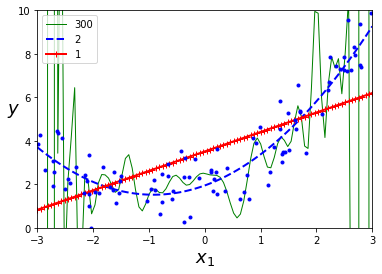

In [15]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

for style, width, degree in (('g-', 1, 300), ('b--', 2, 2), ('r-+', 2, 1)):
    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomal_regression = Pipeline([
        ('poly_featurese', polybig_features),
        ('std_scaler', std_scaler),
        ('lin_reg', lin_reg),
    ])
    polynomal_regression.fit(X, y)
    y_newbig = polynomal_regression.predict(X_new)
    plt.plot(X_new, y_newbig, style, label=str(degree), linewidth=width)
    
plt.plot(X, y, "b.", linewidth=3)
plt.legend(loc="upper left")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
plt.show()

では，最適な多項式の次元数は？？

+ 交差検証を使ってモデルの汎化性能を測定
+ 学習曲線をプロットする

# Learning Curves

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=10)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
        
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.legend(loc="upper right", fontsize=14)   # not shown in the book
    plt.xlabel("Training set size", fontsize=14) # not shown
    plt.ylabel("RMSE", fontsize=14)              # not shown

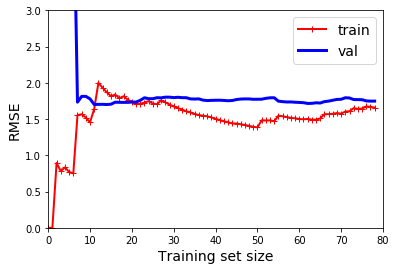

In [23]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)
plt.axis([0, 80, 0, 3])
plt.show()

高バイアスの典型例（単純な線形回帰の場合）

trainとvalが互いに接近し，訓練誤差（train）が大きい

多項式回帰（10次元）の場合はどうだろうか

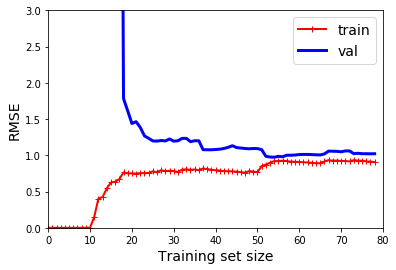

In [24]:
polynomal_regression = Pipeline([
    ('poly_features', PolynomialFeatures(degree=10, include_bias=False)),
    ('lin_reg', LinearRegression()),
])

plot_learning_curves(polynomal_regression, X, y)
plt.axis([0, 80, 0, 3])
plt.show()

高バリアンスの典型例

訓練誤差が小さく，trainとvalが離れている（上記の場合最後近づいているが）．ただし，サンプル数を増やしていけば互いに近づいていく（サンプル数が無限に増えると，たとえ過学習だとしても，どんな新しいデータにも適合するような汎化モデルに近づくため）